In [28]:
import pandas as pd
import numpy as np

In [29]:
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

import cufflinks as cf

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')

In [31]:
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

-----------------

# Ständige Wohnbevölkerung Stadt Zürich – 1993 bis 2017

In [32]:
df = pd.read_excel('Daten/Bevölkerung/Ständige-Wohnbevölkerung.xlsx', header=7).fillna(0)

In [33]:
df.head()

,Jahr,Wirtschaftliche Wohnbevölkerung,Zivilrechtliche Wohnbevölkerung,Ständige Wohnbevölkerung
0,1993,360898,342725,343045
1,1994,360848,343005,342872
2,1995,360826,341466,343869
3,1996,359648,339002,341250
4,1997,358594,335809,338594


In [34]:
df.columns

Index(['Jahr', 'Wirtschaftliche Wohnbevölkerung',
       'Zivilrechtliche Wohnbevölkerung', 'Ständige Wohnbevölkerung'],
      dtype='object')

In [50]:
trace1 = go.Scatter(x=df.Jahr, y=df['Ständige Wohnbevölkerung'], 
                    name="Ständige Wohnbevölkerung",
                    mode='lines+markers',
# mode can be 'markers', 'lines+markers', 'lines'
                    
                    fill='tozeroy',
                        line = dict(
                            width = 4,
                            color = '#5120B3',
                        ),
                    
                        marker = dict(
                            symbol='circle-dot',
                            size = 10,
                            color = '#84B5F4',
                            line = dict(
                                width = 2
                            )
                        )
                    )  

data = [trace1]

layout = go.Layout(
    title='Ständige Wohnbevölkerung Stadt Zürich – 1993 bis 2018',
    font=dict(
            family='Arial, sans-serif',
            size=14,
            color='#7f7f7f'),

    xaxis=dict(
        title='Jahr',
        titlefont=dict(
            family='Arial, sans-serif',
            size=12,
            color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True
    ),
    
    yaxis=dict(
        title='Anzahl Personen',
        titlefont=dict(
            family='Arial, sans-serif',
            size=12,
            color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='hover-chart-basic')

-----------------

# Ständige Wohnbevölkerung Stadt Zürich – 2010 bis 2017

In [51]:
df1 = df[['Jahr', 'Ständige Wohnbevölkerung']][17:]

In [52]:
df1

,Jahr,Ständige Wohnbevölkerung
17,2010,371633
18,2011,376990
19,2012,380777
20,2013,384786
21,2014,391359
22,2015,396955
23,2016,402762
24,2017,409120


In [53]:
trace1 = go.Scatter(x=df1.Jahr, y=df1['Ständige Wohnbevölkerung'], 
                    name="Ständige Wohnbevölkerung",
                    mode='lines+markers',  # mode can be 'markers', 'lines+markers', 'lines'
                    fill='tozeroy',
                        line = dict(
                            width = 2,
                            color = '#E4D7F9'
                        ),
                        marker = dict(
                            symbol='square',
                            size = 11,
                            color = '#590DDE',
                            line = dict(
                                width = 1)
                        )
                    ) 

data = [trace1]

layout = go.Layout(
    title='Ständige Wohnbevölkerung Stadt Zürich – 2010 bis 2017',
    font=dict(
            family='Arial, sans-serif',
            size=14,
            color='#7f7f7f'),

    xaxis=dict(
        title='Jahr',
        titlefont=dict(
            family='Arial, sans-serif',
            size=12,
            color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True
    ),
    
    yaxis=dict(
        title='Anzahl Personen',
        titlefont=dict(
            family='Arial, sans-serif',
            size=12,
            color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='hover-chart-basic')

------------


Plotten mit matplotlib

In [54]:
df1 = df.set_index('Jahr')

In [55]:
df1[['Ständige Wohnbevölkerung']].head(5)

,Ständige Wohnbevölkerung
Jahr,
1993,343045
1994,342872
1995,343869
1996,341250
1997,338594


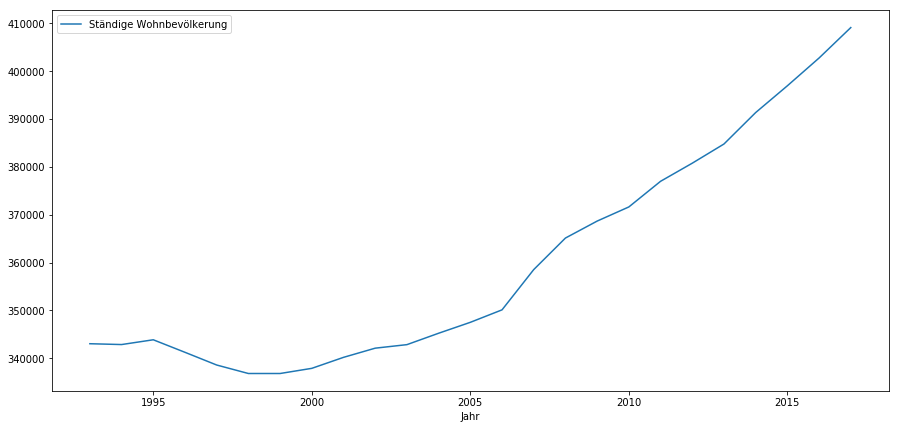

In [56]:
df1[['Ständige Wohnbevölkerung']].plot(figsize=(15,7))

----------------

# Ständige Wohnbevölkerung nach Stadtkreisen – 2017

In [57]:
df2 = pd.read_excel('Daten/Bevölkerung/Wohnbevoelkerung-nach-Stadtkreis.xlsx', header=7)

In [58]:
df2.head()

,Unnamed: 0,Total,Schweizer/-innen,Ausländer/-innen,Anteil ausländische Bevölkerung (%)
0,Ganze Stadt,423310,286255,137055,32.4
1,Kreis 1,5728,3985,1743,30.4
2,Rathaus,3266,2271,995,30.5
3,Hochschulen,677,456,221,32.6
4,Lindenhof,955,681,274,28.7


In [59]:
df3 = df2.iloc[[1,6,10,14,18,21,24,29,33,36,39,43], [0,1]]

In [60]:
df3

,Unnamed: 0,Total
1,Kreis 1,5728
6,Kreis 2,33593
10,Kreis 3,50042
14,Kreis 4,28775
18,Kreis 5,15666
21,Kreis 6,33614
24,Kreis 7,37458
29,Kreis 8,16541
33,Kreis 9,54716
36,Kreis 10,40341


In [61]:
df4.columns

Index(['Quartier', 'Total'], dtype='object')

In [62]:
df3.rename(columns={'Unnamed: 0':'Quartier'}, inplace=True)

In [63]:
df3

,Quartier,Total
1,Kreis 1,5728
6,Kreis 2,33593
10,Kreis 3,50042
14,Kreis 4,28775
18,Kreis 5,15666
21,Kreis 6,33614
24,Kreis 7,37458
29,Kreis 8,16541
33,Kreis 9,54716
36,Kreis 10,40341


In [64]:
trace1 = go.Bar(
    x=df3.Quartier,
    y=df3['Total'], 
    name="Stadtkreise",
    marker=dict(color='#FFD700') # set the marker color to gold
)
data = [trace1]

layout = go.Layout(
    title='Ständige Wohnbevölkerung nach Stadtkreisen – 2017',
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f'),
    autosize=False,
    width=900,
    height=600,
    bargroupgap=0.1,
    bargap=0.2,

    xaxis=dict(
        title='Stadtkreis',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        tickwidth=1,
        ticklen=10,
        automargin=True
    ),
    
    yaxis=dict(
        title='Anzahl Personen',
        titlefont=dict(family='Arial, sans-serif', size=12, color='#7f7f7f'),
        rangemode='tozero',
        nticks=8,
        exponentformat='none',
        tickwidth=1,
        ticklen=10,
        automargin=True
    )
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='hover-chart-basic')

In [65]:
df3.to_excel('Daten/Plotly/Bevölkerung_Stadtkreise_2017.xlsx')